In [49]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic



# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break

#     # Draw landmark annotation on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     mp_drawing.draw_landmarks(
#         image,
#         results.face_landmarks,
#         mp_holistic.FACEMESH_CONTOURS,
#         landmark_drawing_spec=None,
#         connection_drawing_spec=mp_drawing_styles
#         .get_default_face_mesh_contours_style())
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
cap.release()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [50]:
results.count

<method 'count' of 'tuple' objects>

#Converting Mediapipe to Dataframe

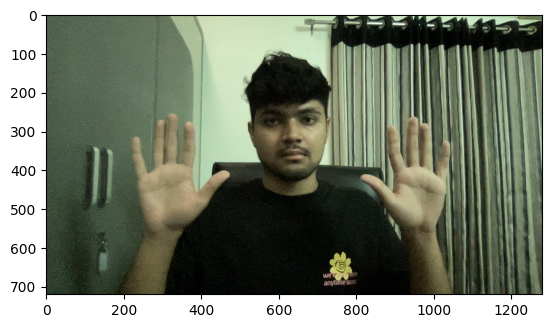

In [51]:
plt.imshow(image)

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

face = pd.DataFrame()
pose = pd.DataFrame()
left_hand = pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks is not None:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
if results.pose_landmarks is not None:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
if results.left_hand_landmarks is not None:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
if results.right_hand_landmarks is not None:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i, ['x','y','z']] = [point.x, point.y,point.z]

#Create the Kaggle Type Format from our detected Landmarks

<Axes: xlabel='x', ylabel='y'>

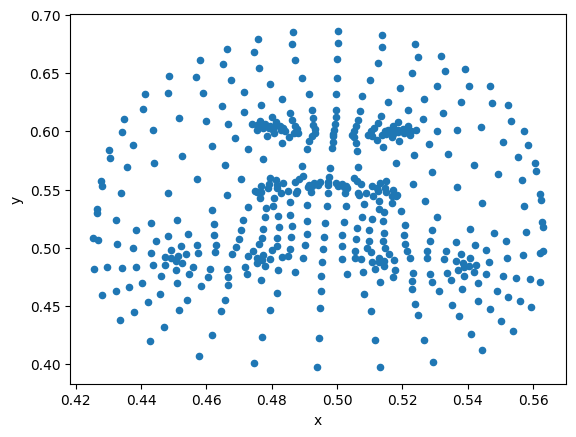

In [21]:
face.plot(x='x', y='y',kind='scatter')

In [23]:
landmarks = pd.DataFrame()

Indices in face

In [29]:
face

,landmark_index,x,y,z,type
0,0,0.498469,0.585559,-0.019959,face
1,1,0.497129,0.547353,-0.033004,face
2,2,0.497412,0.560623,-0.018274,face
3,3,0.490846,0.512087,-0.023247,face
4,4,0.496846,0.535668,-0.034611,face
...,...,...,...,...,...
463,463,0.510569,0.488047,0.007279,face
464,464,0.507188,0.490195,0.003286,face
465,465,0.505568,0.491227,-0.001210,face
466,466,0.538909,0.483109,0.011681,face


In [25]:
face.shape

(468, 3)

In [40]:
def create_frame_landmark_df(results,frame):
    #for having values and rows for every landmark index
    xyz_skel= xyz[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()

    if results.face_landmarks is not None:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
    if results.pose_landmarks is not None:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
    if results.left_hand_landmarks is not None:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x','y','z']] = [point.x, point.y,point.z]
    if results.right_hand_landmarks is not None:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x','y','z']] = [point.x, point.y,point.z]

    face = face.reset_index().rename(columns={'index':'landmark_index'}).assign(type='face')

    pose = pose.reset_index().rename(columns={'index':'landmark_index'}).assign(type='pose')

    left_hand = left_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='left_hand')

    right_hand = right_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='right_hand')

    landmarks = pd.concat([face,pose,left_hand,right_hand]).reset_index(drop=True)
    #So that skel will have landmarks even if they do not exist
    landmarks = xyz_skel.merge(landmarks, on =['type','landmark_index'], how='left')
    #to have actual unique frames
    landmarks = landmarks.assign(frame=frame)
    return landmarks

In [43]:
create_frame_landmark_df(results,0)

,type,landmark_index,x,y,z,frame
0,face,0,0.498469,0.585559,-0.019959,0
1,face,1,0.497129,0.547353,-0.033004,0
2,face,2,0.497412,0.560623,-0.018274,0
3,face,3,0.490846,0.512087,-0.023247,0
4,face,4,0.496846,0.535668,-0.034611,0
...,...,...,...,...,...,...
538,right_hand,16,0.253022,0.509995,-0.039105,0
539,right_hand,17,0.220154,0.694866,-0.021426,0
540,right_hand,18,0.210502,0.637798,-0.030854,0
541,right_hand,19,0.206243,0.599260,-0.035431,0


In [42]:
landmarks = create_frame_landmark_df(results,0)

In [31]:
pose.shape

(33, 3)

In [32]:
left_hand.shape

(21, 3)

In [33]:
right_hand.shape

(21, 3)

#Sign Counts

In [45]:
train['sign'].value_counts()

sign
listen    415
look      414
shhh      411
donkey    410
mouse     408
         ... 
dance     312
person    312
beside    310
vacuum    307
zipper    299
Name: count, Length: 250, dtype: int64

#Kaggle Competition Data

In [12]:
train = pd.read_csv('/Users/pavan/MLProjects/ASL/asl-signs/train.csv')
pq_file = '/Users/pavan/MLProjects/ASL/asl-signs/train_landmark_files/16069/10042041.parquet'
xyz = pd.read_parquet(pq_file)

#Maximum Amount of Points to predict

In [19]:
xyz.query('frame == 83')['type'].value_counts()

type
face          468
pose           33
left_hand      21
right_hand     21
Name: count, dtype: int64

In [13]:
train.query('sequence_id==10042041')

,path,participant_id,sequence_id,sign
101,train_landmark_files/16069/10042041.parquet,16069,10042041,green


In [14]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)


In [15]:
xyz_np = load_relevant_data_subset(pq_file)